# **Import data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gs://strong-bucket/lichess/lichess2013.csv", delimiter = ",", encoding = "utf-8")

**Descriptive statistics**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3386423 entries, 0 to 3386422
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   event            object 
 1   white            object 
 2   black            object 
 3   result           object 
 4   UTCDate          object 
 5   day              int64  
 6   month            int64  
 7   year             int64  
 8   UTCTime          object 
 9   whiteELO         float64
 10  blackELO         float64
 11  RatingDiff       float64
 12  whiteRatingDiff  float64
 13  blackRatingDiff  float64
 14  ECO              object 
 15  opening          object 
 16  timeControl      object 
 17  termination      object 
 18  totalMove        int64  
dtypes: float64(5), int64(4), object(10)
memory usage: 490.9+ MB


In [4]:
df.nunique()

event                  7
white              60997
black              62355
result                 3
UTCDate              366
day                   31
month                 12
year                   2
UTCTime            86400
whiteELO            1749
blackELO            1768
RatingDiff          1141
whiteRatingDiff     1140
blackRatingDiff     1153
ECO                  489
opening             2771
timeControl          978
termination            3
totalMove            168
dtype: int64

In [5]:
df.head()

,event,white,black,result,UTCDate,day,month,year,UTCTime,whiteELO,blackELO,RatingDiff,whiteRatingDiff,blackRatingDiff,ECO,opening,timeControl,termination,totalMove
0,Rated Correspondence game,felixrbran,wiles,0-1,2013.07.02,2,7,2013,21:16:17,1398.0,1767.0,369.0,-3.0,3.0,A00,Polish Opening,NaN,Normal,25
1,Rated Correspondence game,singhk,bhangooj,0-1,2013.07.12,12,7,2013,04:25:22,1538.0,1461.0,77.0,-113.0,113.0,A00,Grob Opening,NaN,Normal,10
2,Rated Correspondence game,Mrkvak,?,1-0,2013.04.04,4,4,2013,19:44:52,NaN,NaN,NaN,NaN,NaN,A01,Nimzo-Larsen Attack: Modern Variation #4,NaN,Normal,38
3,Rated Correspondence game,Unknown Player,CaLiBRe,1-0,2013.04.09,9,4,2013,19:09:36,NaN,NaN,NaN,NaN,NaN,B01,Scandinavian Defense,NaN,Normal,20
4,Rated Correspondence game,dbalka,Polinusik,1-0,2013.04.11,11,4,2013,19:43:45,1682.0,1122.0,560.0,2.0,-5.0,B02,Alekhine Defense: Mokele Mbembe,NaN,Normal,23


In [6]:
round(df.describe(), 3)

,day,month,year,whiteELO,blackELO,RatingDiff,whiteRatingDiff,blackRatingDiff,totalMove
count,3386423.000,3386423.000,3386423.000,3380733.000,3380733.000,3380733.000,3380733.000,3380733.000,3386423.000
mean,16.167,8.182,2013.000,1613.270,1603.674,153.787,0.190,-1.751,33.761
std,8.836,3.224,0.006,213.715,219.879,132.403,34.322,39.031,16.016
min,1.000,1.000,2012.000,758.000,735.000,0.000,-620.000,-618.000,0.000
25%,9.000,6.000,2013.000,1473.000,1462.000,54.000,-10.000,-11.000,23.000
50%,16.000,9.000,2013.000,1611.000,1599.000,119.000,2.000,-3.000,32.000
75%,24.000,11.000,2013.000,1753.000,1747.000,216.000,10.000,10.000,43.000
max,31.000,12.000,2013.000,2581.000,2600.000,1376.000,638.000,649.000,191.000


(array([3.305000e+03, 3.371700e+04, 2.019540e+05, 6.790650e+05,
        1.139883e+06, 8.856240e+05, 3.402940e+05, 8.611800e+04,
        1.051800e+04, 2.550000e+02]),
 array([ 758. ,  940.3, 1122.6, 1304.9, 1487.2, 1669.5, 1851.8, 2034.1,
        2216.4, 2398.7, 2581. ]),
 <BarContainer object of 10 artists>)

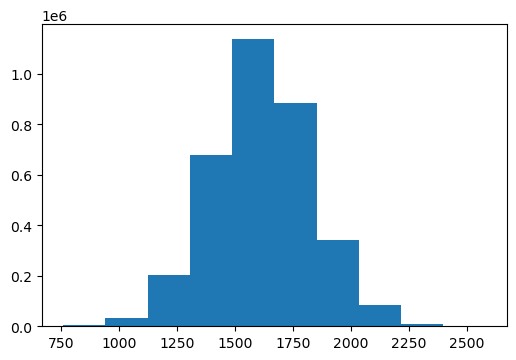

In [7]:
plt.figure(dpi = 100)
plt.hist(df["whiteELO"])

(array([3.51600e+03, 3.77500e+04, 2.18497e+05, 6.74524e+05, 1.17493e+06,
        8.45662e+05, 3.30081e+05, 8.55040e+04, 1.00240e+04, 2.45000e+02]),
 array([ 735. ,  921.5, 1108. , 1294.5, 1481. , 1667.5, 1854. , 2040.5,
        2227. , 2413.5, 2600. ]),
 <BarContainer object of 10 artists>)

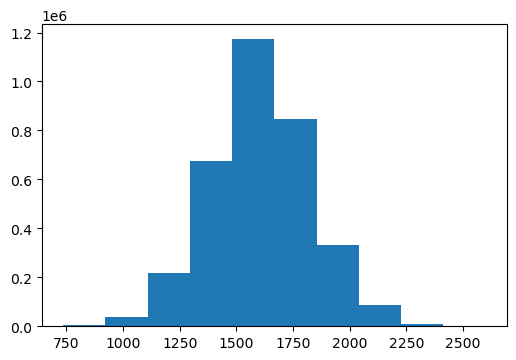

In [8]:
plt.figure(dpi = 100)
plt.hist(df["blackELO"])

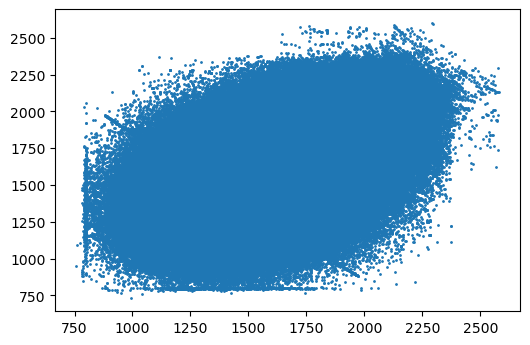

In [9]:
plt.figure(dpi = 100)
plt.scatter(df["whiteELO"], df["blackELO"], s = 1)

(array([1.888853e+06, 9.534930e+05, 3.618240e+05, 1.247050e+05,
        3.821800e+04, 1.073100e+04, 2.290000e+03, 5.410000e+02,
        6.800000e+01, 1.000000e+01]),
 array([   0. ,  137.6,  275.2,  412.8,  550.4,  688. ,  825.6,  963.2,
        1100.8, 1238.4, 1376. ]),
 <BarContainer object of 10 artists>)

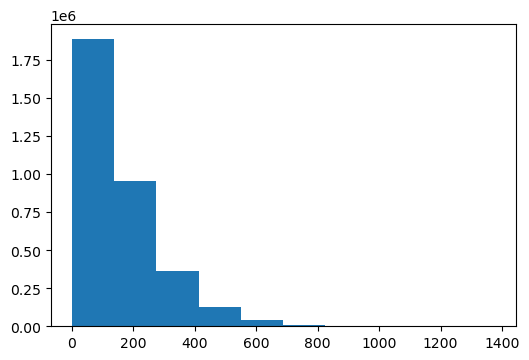

In [10]:
plt.figure(dpi = 100)
plt.hist(df["RatingDiff"])

(array([5.999770e+05, 1.651938e+06, 8.541940e+05, 2.383920e+05,
        3.582300e+04, 5.001000e+03, 9.240000e+02, 1.510000e+02,
        1.900000e+01, 4.000000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <BarContainer object of 10 artists>)

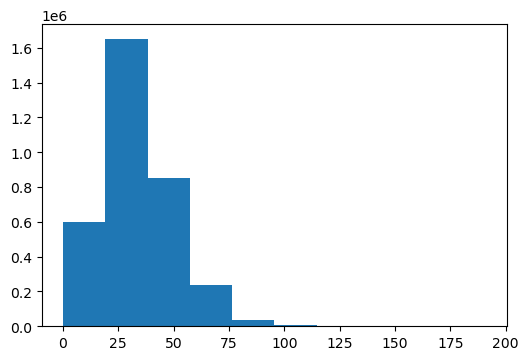

In [11]:
plt.figure(dpi = 100)
plt.hist(df["totalMove"])

# **Data preparation**

**Handle missing value and transform data to float format**

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

x = df[["whiteELO", "blackELO", "ECO", "timeControl", "termination", "totalMove"]]
y = df[["result"]]

# Handle missing value
x["whiteELO"].fillna(round(x["whiteELO"].mean(), 0), inplace = True)
x["blackELO"].fillna(round(x["blackELO"].mean(), 0), inplace = True)
x["timeControl"].fillna(x["timeControl"].mode().iloc[0], inplace = True)

# Convert data to float
le = LabelEncoder()
x["ECO"] = le.fit_transform(x["ECO"])
x["timeControl"] = le.fit_transform(x["timeControl"])
x["termination"] = le.fit_transform(x["termination"])
y = le.fit_transform(y)

# Data scaling
scaler = MinMaxScaler() # Data Normalization
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [13]:
x

,whiteELO,blackELO,ECO,timeControl,termination,totalMove
0,0.351070,0.553351,0.002049,0.724667,0.0,0.130890
1,0.427866,0.389276,0.002049,0.724667,0.0,0.052356
2,0.469007,0.465952,0.004098,0.724667,0.0,0.198953
3,0.469007,0.465952,0.206967,0.724667,0.0,0.104712
4,0.506857,0.207507,0.209016,0.724667,0.0,0.120419
...,...,...,...,...,...,...
3386418,0.512342,0.346917,0.084016,0.013306,1.0,0.099476
3386419,0.469007,0.473458,0.627049,0.724667,1.0,0.141361
3386420,0.289632,0.299196,0.522541,0.133060,1.0,0.162304
3386421,0.487109,0.306166,0.500000,0.724667,1.0,0.115183


In [14]:
y

array([0, 0, 1, ..., 1, 1, 0])

**Descriptive statistics after handle missing value**

(array([3.305000e+03, 3.371700e+04, 2.019540e+05, 6.790650e+05,
        1.145573e+06, 8.856240e+05, 3.402940e+05, 8.611800e+04,
        1.051800e+04, 2.550000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

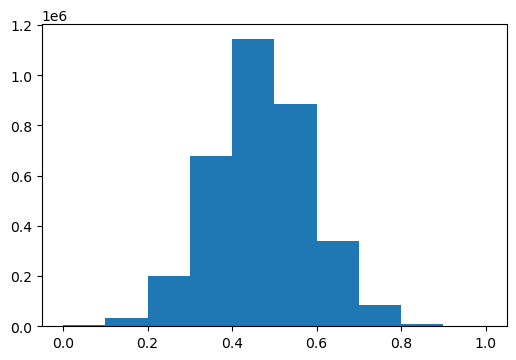

In [15]:
plt.figure(dpi = 100)
plt.hist(x["whiteELO"])

(array([3.51600e+03, 3.77500e+04, 2.18497e+05, 6.74524e+05, 1.18062e+06,
        8.45662e+05, 3.30081e+05, 8.55040e+04, 1.00240e+04, 2.45000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

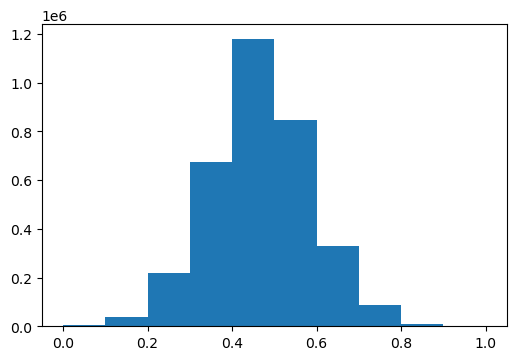

In [16]:
plt.figure(dpi = 100)
plt.hist(x["blackELO"])

Correlation of ELO of both side: 0.56321 



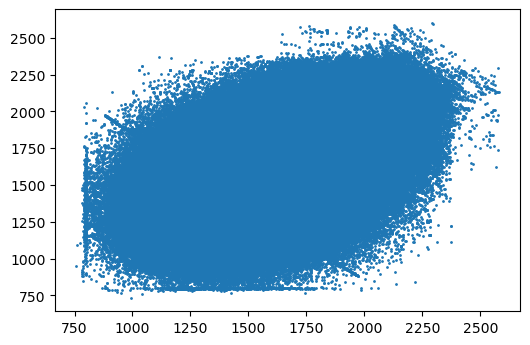

In [17]:
from scipy import stats
print("Correlation of ELO of both side:", round(stats.pearsonr(x["whiteELO"], x["blackELO"])[0], 5), "\n")

plt.figure(dpi = 100)
plt.scatter(df["whiteELO"], df["blackELO"], s = 1)

(array([5.999770e+05, 1.651938e+06, 8.541940e+05, 2.383920e+05,
        3.582300e+04, 5.001000e+03, 9.240000e+02, 1.510000e+02,
        1.900000e+01, 4.000000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

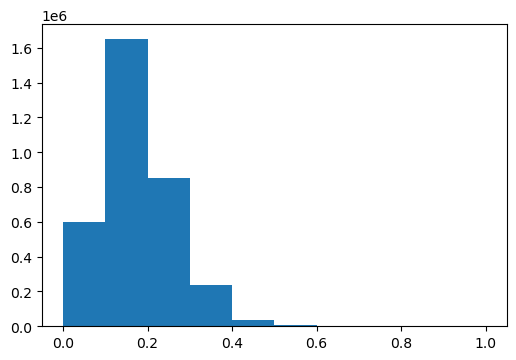

In [18]:
plt.figure(dpi = 100)
plt.hist(x["totalMove"])

# **Data Modelling**

**Splitting data**

In [19]:
import time
start_time = time.time()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

**Modelling**

In [21]:
%pip install catBoost

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics

scorer = "accuracy"
k = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)

In [23]:
LR = LogisticRegression(solver = "lbfgs", multi_class = "multinomial", max_iter = 100)
LR_score = cross_val_score(LR, x_train, y_train, cv = k, scoring = scorer)

In [24]:
DT = DecisionTreeClassifier(max_depth = 5)
DT_score = cross_val_score(DT, x_train, y_train, cv = k, scoring = scorer)

In [25]:
NN = MLPClassifier(solver = "sgd", alpha = 1e-5, activation = "tanh", hidden_layer_sizes = (50, 20), max_iter = 100)
NN_score = cross_val_score(NN, x_train, y_train, cv = k, scoring = scorer)

In [26]:
CB = CatBoostClassifier(iterations = 50,
                        learning_rate = 0.1,
                        random_strength = 0.1,
                        depth = 5,
                        loss_function = "MultiClass",
                        leaf_estimation_method = "Newton")
CB_score = cross_val_score(CB, x_train, y_train, cv = k, scoring = scorer)

0:	learn: 1.0448523	total: 636ms	remaining: 31.2s
1:	learn: 1.0005389	total: 1.13s	remaining: 27s
2:	learn: 0.9629563	total: 1.61s	remaining: 25.3s
3:	learn: 0.9307435	total: 2.1s	remaining: 24.2s
4:	learn: 0.9034395	total: 2.59s	remaining: 23.3s
5:	learn: 0.8794905	total: 3.08s	remaining: 22.6s
6:	learn: 0.8592685	total: 3.57s	remaining: 21.9s
7:	learn: 0.8416369	total: 4.06s	remaining: 21.3s
8:	learn: 0.8257518	total: 4.55s	remaining: 20.7s
9:	learn: 0.8117395	total: 5.05s	remaining: 20.2s
10:	learn: 0.7992366	total: 5.51s	remaining: 19.5s
11:	learn: 0.7880952	total: 6s	remaining: 19s
12:	learn: 0.7783091	total: 6.47s	remaining: 18.4s
13:	learn: 0.7705016	total: 6.95s	remaining: 17.9s
14:	learn: 0.7636277	total: 7.41s	remaining: 17.3s
15:	learn: 0.7567477	total: 7.86s	remaining: 16.7s
16:	learn: 0.7504773	total: 8.35s	remaining: 16.2s
17:	learn: 0.7451971	total: 8.84s	remaining: 15.7s
18:	learn: 0.7403510	total: 9.33s	remaining: 15.2s
19:	learn: 0.7362743	total: 9.78s	remaining: 14.7

**Comparison of models score**

In [27]:
print("Comparison of model efficiency base on F1 score\n")
print("LR  :", np.around(LR_score, 5))
print("DT  :", np.around(DT_score, 5))
print("NN  :", np.around(NN_score, 5))
print("CB  :", np.around(CB_score, 5))
print("\n")
print("Logistic Regression score       :", round(np.mean(LR_score), 5) , " (", round(np.mean(LR_score) * 100, 5), "% ) standard deviation: ", round(np.std(LR_score) * 100, 2), "%")
print("Decision Tree score             :", round(np.mean(DT_score), 5) , " (", round(np.mean(DT_score) * 100, 5), "% ) standard deviation: ", round(np.std(DT_score) * 100, 2), "%")
print("Multi-layer Perceptron score    :", round(np.mean(NN_score), 5) , " (", round(np.mean(NN_score) * 100, 5), "% ) standard deviation: ", round(np.std(NN_score) * 100, 2), "%")
print("CatBoost score                  :", round(np.mean(CB_score), 5) , " (", round(np.mean(CB_score) * 100, 5), "% ) standard deviation: ", round(np.std(CB_score) * 100, 2), "%")

Comparison of model efficiency base on F1 score

LR  : [0.64003 0.64105 0.64086 0.64096 0.64048]
DT  : [0.62811 0.62691 0.62779 0.62805 0.62811]
NN  : [0.64061 0.63992 0.64199 0.64132 0.64004]
CB  : [0.6411  0.64183 0.64228 0.64216 0.64212]


Logistic Regression score       : 0.64068  ( 64.06777 % ) standard deviation:  0.04 %
Decision Tree score             : 0.62779  ( 62.77927 % ) standard deviation:  0.05 %
Multi-layer Perceptron score    : 0.64078  ( 64.07756 % ) standard deviation:  0.08 %
CatBoost score                  : 0.6419  ( 64.18986 % ) standard deviation:  0.04 %


**Finale Evaluation**

In [28]:
# Fitting model with training set
LR.fit(x_train, y_train)
DT.fit(x_train, y_train)
NN.fit(x_train, y_train)
CB.fit(x_train, y_train)

# Predict with testing set
LR_y_pred = LR.predict(x_test)
DT_y_pred = DT.predict(x_test)
NN_y_pred = NN.predict(x_test)
CB_y_pred = CB.predict(x_test)

0:	learn: 1.0448645	total: 742ms	remaining: 36.3s
1:	learn: 1.0004143	total: 1.34s	remaining: 32.2s
2:	learn: 0.9629618	total: 1.96s	remaining: 30.7s
3:	learn: 0.9313393	total: 2.58s	remaining: 29.7s
4:	learn: 0.9036007	total: 3.22s	remaining: 28.9s
5:	learn: 0.8797241	total: 3.84s	remaining: 28.1s
6:	learn: 0.8593599	total: 4.43s	remaining: 27.2s
7:	learn: 0.8417015	total: 5.04s	remaining: 26.5s
8:	learn: 0.8258015	total: 5.65s	remaining: 25.7s
9:	learn: 0.8125236	total: 6.26s	remaining: 25.1s
10:	learn: 0.7999251	total: 6.87s	remaining: 24.3s
11:	learn: 0.7889175	total: 7.44s	remaining: 23.6s
12:	learn: 0.7790650	total: 8.05s	remaining: 22.9s
13:	learn: 0.7705486	total: 8.66s	remaining: 22.3s
14:	learn: 0.7629561	total: 9.26s	remaining: 21.6s
15:	learn: 0.7560533	total: 9.85s	remaining: 20.9s
16:	learn: 0.7499418	total: 10.5s	remaining: 20.3s
17:	learn: 0.7447605	total: 11s	remaining: 19.6s
18:	learn: 0.7398951	total: 11.6s	remaining: 18.9s
19:	learn: 0.7355872	total: 12.2s	remaining

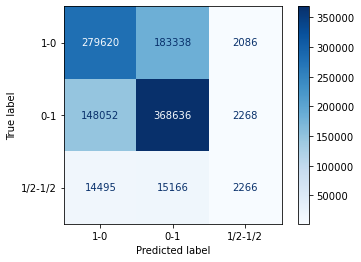

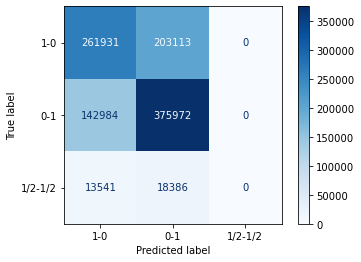

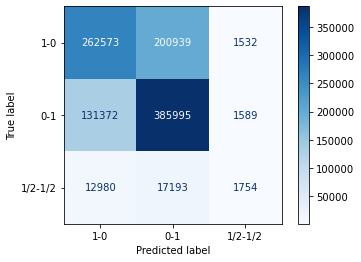

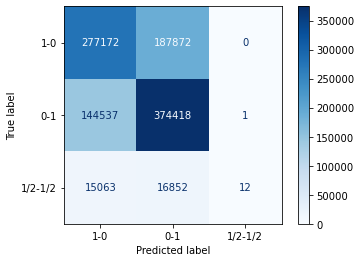

In [29]:
from sklearn.metrics import plot_confusion_matrix

classes = ["1-0", "0-1", "1/2-1/2"]
plot_confusion_matrix(LR, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")
plot_confusion_matrix(DT, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")
plot_confusion_matrix(NN, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")
plot_confusion_matrix(CB, x_test, y_test, display_labels = classes, cmap = plt.cm.Blues, values_format = ".0f")

In [30]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy for Logistic Regression     :", round(accuracy_score(y_test, LR_y_pred) * 100, 5), "%")
print("Accuracy for Decision Tree           :", round(accuracy_score(y_test, DT_y_pred) * 100, 5), "%")
print("Accuracy for Multi-layer Perceptron  :", round(accuracy_score(y_test, NN_y_pred) * 100, 5), "%")
print("Accuracy for Catboost Classifier     :", round(accuracy_score(y_test, CB_y_pred) * 100, 5), "%")
print("\n")
print("F1-Score for Logistic Regression     :", round(f1_score(y_test, LR_y_pred, average = "weighted") * 100, 5), "%")
print("F1-Score for Decision Tree           :", round(f1_score(y_test, DT_y_pred, average = "weighted") * 100, 5), "%")
print("F1-Score for Multi-layer Perceptron  :", round(f1_score(y_test, NN_y_pred, average = "weighted") * 100, 5), "%")
print("F1-Score for Catboost Classifier     :", round(f1_score(y_test, CB_y_pred, average = "weighted") * 100, 5), "%")

Accuracy for Logistic Regression     : 64.03236 %
Accuracy for Decision Tree           : 62.79024 %
Accuracy for Multi-layer Perceptron  : 64.01267 %
Accuracy for Catboost Classifier     : 64.13866 %


F1-Score for Logistic Regression     : 63.26306 %
F1-Score for Decision Tree           : 61.54713 %
F1-Score for Multi-layer Perceptron  : 62.98089 %
F1-Score for Catboost Classifier     : 62.97517 %


In [31]:
times = round((time.time() - start_time)/60, 2)
minutes = int(times)
seconds = int(round((float(times) - minutes) * 0.6, 2) * 100)
print("Data model running time: {} minutes {} seconds".format(minutes, seconds))

Data model running time: 36 minutes 14 seconds
